![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Decision Tree: A Classification Model

## Chapter Importance

Machine Learning is a field that focuses on [**getting a mathematical equation**](https://twitter.com/sotastica/status/1449735653328031745) to make predictions about the future. Although not all Machine Learning models work the same way.

Which types of Machine Learning models can we distinguish so far?

- **Classifiers** to predict **Categorical Variables**
- **Regressors** to predict **Numerical Variables**

The previous chapter covered the explanation of a Regressor model: the Linear Regression.

This chapter covers the explanation of a Classification model: the Decision Tree.

Why do they belong to Machine Learning?

- The Machine wants to get the best numbers of a mathematical equation such that **the difference between reality and predictions is minimum**:

    - **Classifier** evaluates the model based on **prediction success rate**
        $$
        y \stackrel{?}{=} \hat y
        $$
    - **Regressor** evaluates the model based on the **distance between real data and predictions** (residuals) 
        $$
        y - \hat y
        $$

There are many Machine Learning Models of each type.

You don't need to know the process behind each model because they all work the same way (see article). In the end, you will choose the one makes better predictions.

This tutorial will show you how to develop a Decision Tree to calculate the probability of a person to survive the Titanic and the different evaluation metrics we can calculate on Classification Models.

1. How to preprocess/clean the data to fit a Machine Learning model?
    - Dummy Variables
    - Missing Data
2. How to **visualize** a Decision Tree model in Python step by step?
3. How to **interpret** the nodes and leafs values of a Decision Tree plot?
4. How to **evaluate** Classification models?
    - Accuracy
    - Confussion Matrix
    - Sensitivity
    - Specificity
    - ROC Curve
5. How to compare Classification models to choose the best one?

## Load the Data

- This dataset represents **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)

In [1]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic')[['survived', 'sex', 'age', 'embarked', 'class']]
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
...,...,...,...,...,...
889,1,male,26.0,C,First
890,0,male,32.0,Q,Third


## How do we compute a Decision Tree Model in Python?

We should know from the previous chapter that we need function which is accessible from a Class in the library `sklearn`.

### Import the Class

In [2]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

To create a copy of the original's code blueprint in order to not "modify" the source code.

In [3]:
model_dt = DecisionTreeClassifier()

### Access the Function

The theoretical action we'd like to perform is the same we executed in the previous chapter. Therefore, the function should be called the same way:

In [4]:
model_dt.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

Why is it asking for two parameters: `y` and `X`?

- `y`: target ~ independent ~ label ~ class variable
- `X`: explanatory ~ dependent ~ feature variables

### Separate the Variables

In [5]:
target = df_titanic['survived']
explanatory = df_titanic.drop(columns='survived')

### Fit the Model

In [6]:
model_dt.fit(X=explanatory, y=target)

ValueError: could not convert string to float: 'male'

Most of the time, the data isn't prepared to fit the model. Let's dig in why we get the previous error in the next sections.

## Data Preprocessing

The error says:
    
```python
ValueError: could not convert string to float: 'male'
```

From which we can interpret that the function `.fit()` does **not accept values of `string` type** like the ones in `sex` column:

In [9]:
df_titanic

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


### Dummy Variables

Therefore, we need to convert the categorical columns to **dummies** (0s & 1s):

In [10]:
pd.get_dummies(df_titanic, drop_first=True)

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


In [11]:
df_titanic = pd.get_dummies(df_titanic, drop_first=True)

We separate the variables again to take into account the latest modification:

In [12]:
explanatory = df_titanic.drop(columns='survived')
target = df_titanic[['survived']]

Now we should be able to fit the model:

In [13]:
model_dt.fit(X=explanatory, y=target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Missing Data

The data passed to the function contains **missing data** (`NaN`). Precisely 177 people from which we don't have the age:

In [14]:
df_titanic.isna()

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False


In [15]:
df_titanic.isna().sum()

survived          0
age             177
sex_male          0
embarked_Q        0
embarked_S        0
class_Second      0
class_Third       0
dtype: int64

Who are the people who lack the information?

In [16]:
mask_na = df_titanic.isna().sum(axis=1) > 0

In [17]:
df_titanic[mask_na]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
5,0,NaN,1,1,0,0,1
17,1,NaN,1,0,1,1,0
...,...,...,...,...,...,...,...
878,0,NaN,1,0,1,0,1
888,0,NaN,0,0,1,0,1


What could we do with them?

1. Drop the people (rows) who miss the age from the dataset.
2. Fill the age by the average age of other combinations (like males who survived)
3. Apply an algorithm to fill them.
    
We'll choose **option 1 to simplify the tutorial**.

Therefore, we go from 891 people:

In [18]:
df_titanic

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


To 714 people:

In [19]:
df_titanic.dropna()

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


In [20]:
df_titanic = df_titanic.dropna()

We separate the variables again to take into account the latest modification:

In [21]:
explanatory = df_titanic.drop(columns='survived')
target = df_titanic['survived']

Now we shouldn't have any more trouble with the data to finally fit the model.

## `DecisionTreeClassifier()` Small Recap

With repect to the Decision Tree object, we have just instantiate the Class. Therefore, the object won't show calculated attributes, just the default ones:

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

### Fit the Model Again

We don't get any error because we correctly preprocess the data for the model.

Once the model is fitted, we may observe that the object contains more attributes because it has calculated best numbers for the mathematical equation.

In [23]:
model_dt.fit(X=explanatory, y=target)
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
        'class_Third'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x1604f3ce0>}

### Predictions

#### Calculate Predictions

We have a fitted `DecisionTreeClassifier`. Therefore, we should be able to apply the mathematical equation to the original data to get the predictions:

In [24]:
model_dt.predict(X=explanatory)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

#### Add a New Column with the Predictions

Let's create a new `DataFrame` to keep the information of the target and predictions to better understand the topic:

In [25]:
df_pred = df_titanic[['survived']].copy()

And add the predictions:

In [26]:
df_pred['pred_dt'] = model_dt.predict(X=explanatory)
df_pred

,survived,pred_dt
0,0,0
1,1,1
...,...,...
889,1,1
890,0,0


How have we calculated those predictions?

### Model Visualization

The **Decision Tree** model doesn't especifically have a mathematical equation. But rather, a set of conditions represented in a tree:

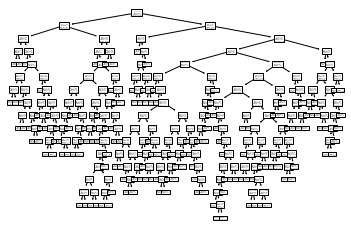

In [27]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt);

There are many conditions, let's recreate a shorter tree to explain the Mathematical Equation of the Decision Tree:

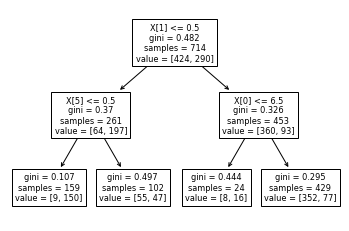

In [28]:
model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X=explanatory, y=target)

plot_tree(decision_tree=model_dt);

Let's make the image bigger:

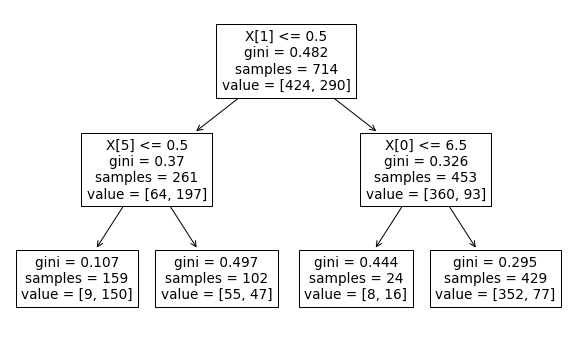

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt);

The conditions are `X[2]<=0.5`. The `X[2]` means the 3rd variable (Python starts counting at 0) of the explanatory ones. If we'd like to see the names of the columns, we need to add the `feature_names` parameter:

In [30]:
explanatory.columns

Index(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
       'class_Third'],
      dtype='object')

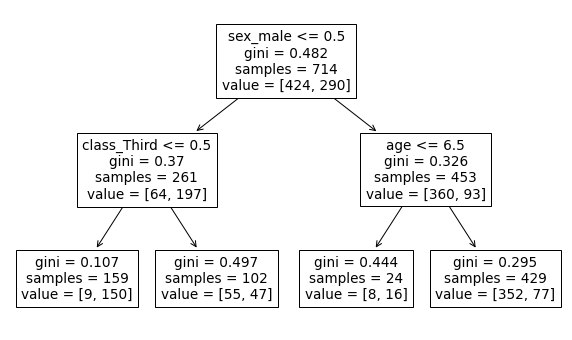

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns);

Let's add some colours to see how the predictions will go based on the fulfilled conditions:

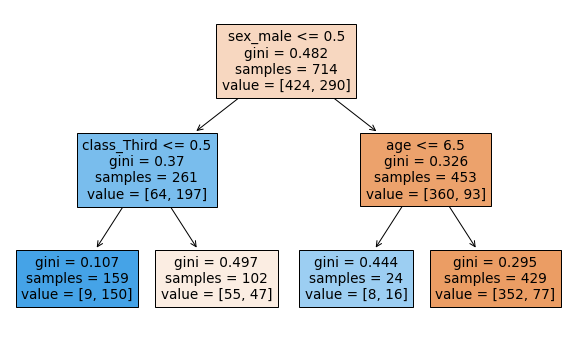

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=explanatory.columns, filled=True);

### How does the Decision Tree Algorithm computes the Mathematical Equation?

The Decision Tree, as well as the Linear Regression algorithms, look for the best numbers in a mathematical equation. The following video explains how the Decision Tree configures the equation:

In [31]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_L39rN6gz7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Model Interpretation

Let's take a person from the data to explain how the model makes a prediction. For the sake of storytelling, let's say the name of the person is John.

John is a 22 year old men who took the titanic on 3rd class, but didn't survive:

In [32]:
df_titanic[:1]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1


Based on the tree the conditions are:

#### 1st condition

- sex_male (John=1) <= 0.5 ~ False

John doesn't fulfill the condition, we move to the right side of the tree.

#### 2nd condition

- age (John=22.0) <= 6.5 ~ False

John doesn't fulfill the condition, we move to the right side of the tree.

#### Leaf

The ultimate node, the leaf, tells us that the training dataset contained 429 males with an age greater than 6.5 years old.

Out of the 429, 77 survived, but 352 didn't make it.

Therefore, the chances of John to survive according to our model are 77 divided by 429:

In [33]:
77/429

0.1794871794871795

Is there a way to calculate the prediction with a `.function()`?

In [34]:
explanatory[:1]

,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1


In [35]:
model_dt.predict_proba(X=explanatory[:1])

array([[0.82051282, 0.17948718]])

We get the same probability.

John had a 17.94% chance to survive the titanic accident.

### Model's Score

#### Calculate the Score

As always, we should have a function to calculate the goodness of the model:

In [36]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

The model is able to predict correctly 80.25% of the people in the dataset.

#### Explain the Score

In [37]:
model_dt.predict_proba(X=explanatory)[:5]

array([[0.82051282, 0.17948718],
       [0.05660377, 0.94339623],
       [0.53921569, 0.46078431],
       [0.05660377, 0.94339623],
       [0.82051282, 0.17948718]])

In [38]:
df_pred['pred_proba_dt'] = model_dt.predict_proba(X=explanatory)[:, 1]

In [39]:
df_pred.pred_proba_dt > 0.5

0      False
1       True
       ...  
889    False
890    False
Name: pred_proba_dt, Length: 714, dtype: bool

In [40]:
import numpy as np

In [41]:
df_pred['pred_dt'] = np.where(df_pred.pred_proba_dt > 0.5, 1, 0)

In [42]:
df_pred

,survived,pred_dt,pred_proba_dt
0,0,0,0.179487
1,1,1,0.943396
...,...,...,...
889,1,0,0.179487
890,0,0,0.179487


In [43]:
df_pred.survived == df_pred.pred_dt

0       True
1       True
       ...  
889    False
890     True
Length: 714, dtype: bool

In [44]:
comp = df_pred.survived == df_pred.pred_dt

In [45]:
comp.sum()

573

In [46]:
comp.sum()/len(comp)

0.8025210084033614

In [47]:
comp.mean()

0.8025210084033614

In [48]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

### The Confusion Matrix to Compute Other Classification Metrics

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

array([[407,  17],
       [124, 166]])

In [51]:
cm = confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

In [52]:
CM = ConfusionMatrixDisplay(cm)

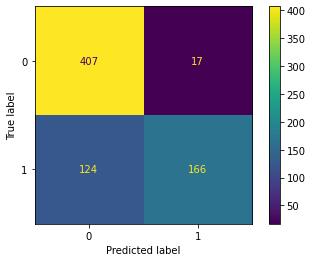

In [53]:
CM.plot();

#### Sensitivity (Recall=1)

In [54]:
cm[1,1]

166

In [55]:
cm[1,:]

array([124, 166])

In [56]:
cm[1,1]/cm[1,:].sum()

0.5724137931034483

In [57]:
sensitivity = cm[1,1]/cm[1,:].sum()

#### Specificity (Recall=0)

In [58]:
cm[0,0]

407

In [59]:
cm[0,:]

array([407,  17])

In [60]:
cm[0,0]/cm[0,:].sum()

0.9599056603773585

In [61]:
sensitivity = cm[0,0]/cm[0,:].sum()

#### Classification Report

In [62]:
from sklearn.metrics import classification_report

In [63]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

In [64]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714



In [65]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt,
    output_dict=True
)

In [66]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.766478,0.907104,0.802521,0.836791,0.823595
recall,0.959906,0.572414,0.802521,0.766160,0.802521
f1-score,0.852356,0.701903,0.802521,0.777129,0.791248
support,424.000000,290.000000,0.802521,714.000000,714.000000


#### ROC Curve

In [67]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [68]:
from sklearn.metrics import RocCurveDisplay

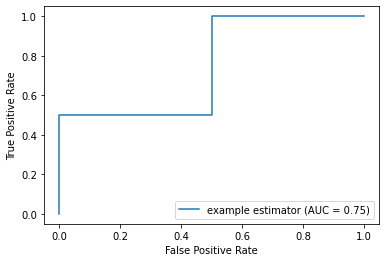

In [171]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([0, 0, 1, 1])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

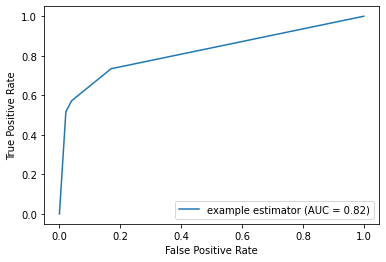

In [172]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = df_pred.survived
>>> pred = model_dt.predict_proba(X=explanatory)[:,1]
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

https://blog.resolvingpython.com/why-all-machine-learning-models-are-the-same

## Other Classification Models

### `RandomForestClassifier()` in Python

#### Fit the Model

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
model_rf = RandomForestClassifier()

In [175]:
model_rf.fit(X=explanatory, y=target)

RandomForestClassifier()

#### Calculate Predictions

In [176]:
model_rf.predict(X=explanatory)[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [177]:
df_pred['pred_rf'] = model_rf.predict(X=explanatory)

#### Model's Score

In [178]:
model_rf.score(X=explanatory, y=target)

0.9117647058823529

### `SVC()` in Python

#### Fit the Model

In [179]:
from sklearn.svm import SVC

In [180]:
model_sv = SVC()

In [181]:
model_sv.fit(X=explanatory, y=target)

SVC()

#### Calculate Predictions

In [182]:
model_sv.predict(X=explanatory)[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [183]:
df_pred['pred_sv'] = model_sv.predict(X=explanatory)

#### Model's Score

In [184]:
model_sv.score(X=explanatory, y=target)

0.6190476190476191

## Which One Is the Best Model? Why?

In [185]:
model_dt.score(X=explanatory, y=target)

0.8025210084033614

In [186]:
model_rf.score(X=explanatory, y=target)

0.9117647058823529

In [187]:
model_sv.score(X=explanatory, y=target)

0.6190476190476191

In [188]:
df_pred.head(10)

,survived,pred_dt,pred_rf,pred_sv
0,0,0,0,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,0,0,0,0
6,0,0,0,0
7,0,0,0,1
8,1,1,1,0
9,1,1,1,0
10,1,1,1,1


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.